Otsu thresholding theory:
1. input image
2. Histogram 
3. Set up initial wi (0) and i(0)
4. Update values of wi(T) and i(T)
5. compute variance
6. select threshold intensity T
7. Image clipping 
8. Output image

In [3]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x00000159C0DA9590>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


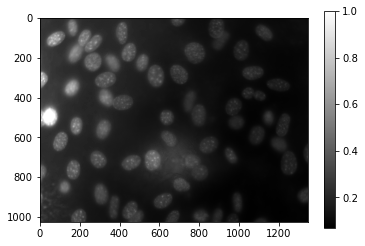

In [4]:
#Input image
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
figure()  
imshow(img_1, 'gray')
colorbar()

(array([616806., 475731., 174730.,  59216.,  29201.,   9181.,   4539.,
          2020.,   1205.,   3627.]),
 array([0.06666667, 0.16      , 0.25333333, 0.34666666, 0.44      ,
        0.53333336, 0.62666667, 0.72      , 0.81333333, 0.9066667 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

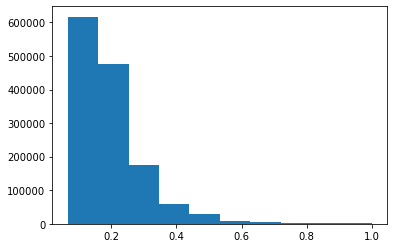

In [7]:
#histogram 
plt.hist(img_1.flatten())

In [65]:
def otsu_thresholding(img):
    n, bins, patches = plt.hist(img.flatten(), bins = 100)
    copy = img.copy()
    thres = 0
    bcv = list()
    w0_sum = 0
    mean_sum0 = 0
    v0_sum = 0
    mean_sum1 = 0
    v1_sum = 0
    w0 = 0
    w1 = 0
    w1_sum = 0
    m1 = 0
    for i in range(0,len(n)):
        for j in range(0,i):
            w0_sum += n[j]
            mean_sum0 += j*n[j]
            

        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i])
        for m in range(0,i):
            v0_sum += ((m-mean_0)**2)* n[m]
        
        v0 = v0_sum / sum(n[0:1])
        
        for k in range(i, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += k*n[k]
            
        w1 = w1_sum / sum(n)
        mean_1 = mean_sum1 / sum(n[i:len(n)])

        for s in range(i,len(n)):
            v1_sum += ((s-mean_1)**2)* n[s]
        
        v1 = v1_sum / sum(n[i:len(n)])
        bclv = w0 * v0 + w1 * v1
        bcv.append(bclv)
    optimal_thres = max(bcv)
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = l
        l += 1
    print(l) 

    for o in ndindex(copy.shape):
        if copy[o] < (thres / 100): 
            copy[o] = 0
        else:
            copy[o] = 1

    figure()  
    imshow(copy, 'gray')
    colorbar()
    

C:\Users\marie\AppData\Local\Temp\ipykernel_19448\1299279654.py:22: RuntimeWarning: invalid value encountered in double_scalars
  mean_0 = mean_sum0 / sum(n[0:i])


100


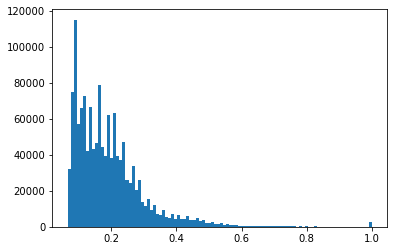

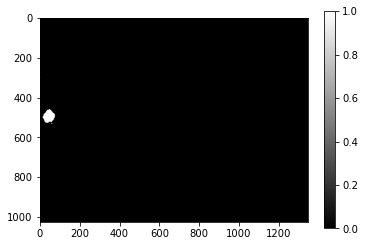

In [66]:
otsu_thresholding(img_1)